# Error Mitigation through ancillas

Since parity and total magnetization is conserved during time evolution, one can use the four free ancillas to check if data does not conserve these quantities.
Here the list of check-circuit that we test:
* Copy check & 4Copy Check
* Parity Check one ancilla & two ancillas
* Magnetization Check

### Notation
Firstly, we would like to introduce the notation that we will use to describe the different circuits:

* We'll call control qubits those that are used to simulate time evolution given by the Hamiltonian
* We'll call ancillas those that are used to implement error mitigation

In the images of the circuits the qubits order corrispond to the Jakarta one, so qubits[1,3,5]= control qubits and qubits[0,2,4,6]=ancillas



In [1]:
import funzioni01 as f1
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.ibmq.job import job_monitor
#from qiskit.providers.ibmq import least_busy
from copy import deepcopy
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
import time
import qiskit.quantum_info as qi
from qiskit.utils import QuantumInstance
import qiskit.ignis.mitigation.measurement as mc
#from qiskit.result import marginal_counts
from sympy import Symbol, Matrix,cos,sin,eye
from sympy.physics.quantum import TensorProduct as Tp
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex as lm 
from qiskit.visualization import array_to_latex


import numpy as np
from math import pi as pi
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'funzioni01'

## Copy Check

Let see the copy check's circuit:



In [2]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
#qc.cx(qr[5],qr[6])
qc.cx(qr[5],qr[4])
qc.cx(qr[3],qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[3],qr[1])

qc.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

### Circuit analysis
Suppose we have as input state a generic overlap of the magnetization=2 Hilbert subspace:
$ |\psi_{in}⟩ = \alpha |011⟩+\beta|101⟩+\gamma|110⟩ $,

The total state (considering also the ancillas) is:

$|\psi_{tot}⟩=|\psi_{in}⟩ \otimes |000⟩ $.

Applying the check circuit gives:

$|\psi_{tot}⟩ = \alpha|011⟩|011⟩+\beta|101⟩|101⟩+\gamma|110⟩|110⟩$ 


If during the time evolution of the control qubits and the read out there're no mistakes one should measure an ancillas state with magnetization=2, so we reject all data that does not respect this constraint. 


Since after the check circuit the $|\psi_{tot}⟩$ cannot be write as a tensor product between control qubits state and ancillas state, is important to measure the control qubits before the ancillas.
### Sum up
* allowed ancillas coditions: $[|110⟩, |101⟩, |011⟩]$

## 4Copy Check
Since we want to use all four available ancillas, to the Copy Check circuit we add a C-NOT gate between qubits 5 and 6 as in figure:









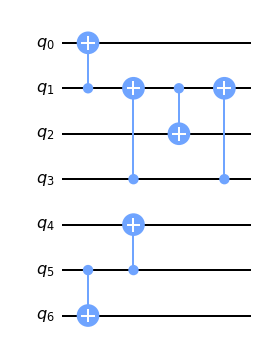

In [9]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.cx(qr[5],qr[6])
qc.cx(qr[5],qr[4])
qc.cx(qr[3],qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[3],qr[1])

qc.draw(output='mpl')

In addition to the constraint magnetization=2 ancillas [0,2,4] state it adds the constraint that ancillas [4,6] must have same measurement result.

### Sum up

* allowed ancillas conditions: $[|1100⟩, |1011⟩, |0111⟩]$

## Parity Check one ancilla
Here the circuit for parity check one ancilla:
 







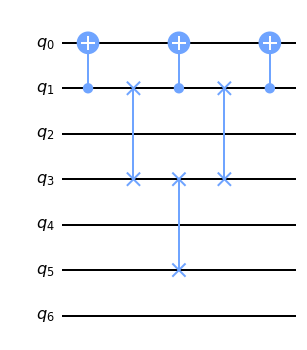

In [10]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.draw(output='mpl')

### Curcuit Analysis
Suppose we have as input state a generic state of the Hilbert's Space: 

$ |\psi_{in}⟩ = |\psi_{even}⟩+|\psi_{odd}⟩ $ 

where:

* $|\psi_{even}⟩ = \alpha_0|000⟩+\beta_0|110⟩+\gamma_0|101⟩+\delta_0|011⟩ $
* $|\psi_{odd}⟩ = \alpha_1|100⟩+\beta_1|010⟩+\gamma_1|001⟩+\delta_1|111⟩ $

Considering also the ancilla we have as total input state:

$|\psi_{tot}⟩=|\psi_{even}⟩\otimes|0⟩+|\psi_{odd}⟩\otimes|0⟩ $.

Applying the circuit gives as total output state:

$|\psi_{tot}⟩=|\psi_{even}⟩\otimes|0⟩+|\psi_{odd}⟩\otimes|1⟩ $.

Since parity is conserved during time evolution and the initial state belong to the even subspace, if we don't measure |0⟩ on the ancilla the data is reject.

The time evolution, if no errors occur, cannot go out from even subspace. The output state from the check circuit is in the form $ |\psi_{even}⟩\otimes|0⟩ $ so the ancilla can be measure also before the control qubits.

The SWAP gates, compose by three C-NOT gates, are needed due to the geometry of Jakarta so the total number of C-NOT needed to implement the check is twelve. That increase, not trivially, the lenght of the circuit.

After the circuit the control qubits 1 and 5 are swapped.


### Sum up

* allowed ancilla condition: |0⟩
* check circuit swap qubit 1 and 5









### Parity Check two ancillas
Here the circuit parity check two ancillas:

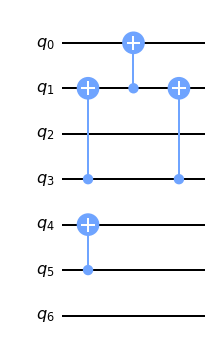

In [6]:
qr1=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr1)
qc.cx(qr1[5],qr1[4])
qc.cx(qr1[3],qr1[1])
qc.cx(qr1[1],qr1[0])
qc.cx(qr1[3],qr1[1])
qc.draw(output='mpl')

### Circuit analysis
Let's take as input state a generic overlap of even subspace:

$|\psi_{in}⟩=\alpha|000⟩+\beta|110⟩+\gamma|101⟩+\delta|011⟩$.

The total state considering ancillas is:

$|\psi_{tot}⟩=|\psi_{in}⟩\otimes|00⟩ $.

Applying the check circuit gives as total ouput state:

$ |\psi_{tot}⟩=(\alpha|000⟩+\beta|110⟩)\otimes|00⟩+(\gamma|101⟩+\delta|011⟩)\otimes|11⟩ $.

If in input we have a generic odd state as total output state we have:

$ |\psi_{tot}⟩=(\alpha|100⟩+\beta|010⟩)\otimes|10⟩+(\gamma|001⟩+\delta|111⟩)\otimes|01⟩ $ 

So if don't measure on the ancillas |00⟩ or |11⟩ we reject the data.

Differently from the parity check one ancilla, in this case control qubits must be measure before ancillas.

In this case we need only four C-NOT gates to implement the check.

### Sum up 

* allowed ancillas condition: $ [|00⟩, |11⟩]$




# Magnetization Check




Firstly we have to introduce che C-S (control-s) gate:

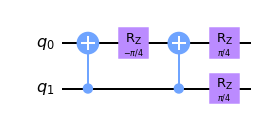

In [11]:
pi=np.pi
qr=QuantumRegister(2,name='q')
CS_qc=QuantumCircuit(qr,name='C-S')

CS_qc.cx(qr[1],qr[0])
CS_qc.rz(-pi/4,qr[0])
CS_qc.cx(qr[1],qr[0])
CS_qc.rz(pi/4,qr[0])
CS_qc.rz(pi/4,qr[1])


CS_qc.draw(output='mpl')

### Circuit analysis
The C-S gate act, on the 2-qubit computationial base, as an identity except for the state |11⟩ to which add a phase $\phi = i$.

Let's consider a generic 2-qubit state as input:

$|\psi_{in}⟩=\alpha|00⟩+\beta|01⟩+\gamma|10⟩+\delta|11⟩$ 

Applying the C-S gives:

$|\psi_{out}⟩=\alpha|00⟩+\beta|01⟩+\gamma|10⟩+i*\delta|11⟩$ 

Let's see now the magnetization check circuit:





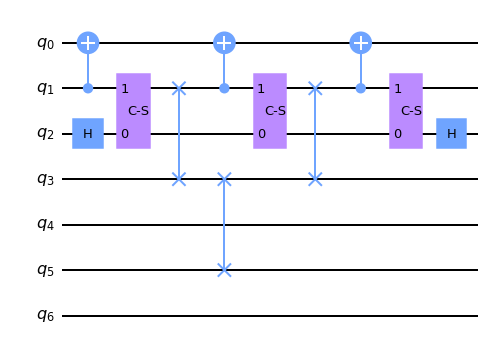

In [12]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.h(qr[2])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.h(qr[2])
qc.draw(output='mpl')

### Circuit Analysis
On ancilla 0 control qubits's parity is saved while on ancilla 2, initialized as $|+⟩$ Hadamand state, C-S gate is applied for each control qubits. If control qubits have total magnetization=2 a phase $\phi=i^2=-1$ is added to the $|1⟩$ part of the $|+⟩$  given $|-⟩$ Hadamad state. After that, applying H gate, gives $|1⟩$ as ancilla 2 output state.

Let's see how magnetization check act with different magnetization:

* Generic state with magnetization=0 $|\psi_{in}⟩=|000⟩\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=|000⟩\otimes|00⟩ $


* Generic state with magnetization=1 $|\psi_{in}⟩=(\alpha|100⟩+\beta|010⟩+\gamma|001⟩)\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=(\alpha|100⟩+\beta|010⟩+\gamma|001⟩)\otimes\frac{1}{2}((1+i)|10⟩+(1-i)|11⟩)$


* Generic state with magnetization=2 $|\psi_{in}⟩=(\alpha|110⟩+\beta|101⟩+\gamma|011⟩)\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=(\alpha|110⟩+\beta|101⟩+\gamma|011⟩)\otimes|01⟩$ 


* Generic state with magnetization=3 $|\psi_{in}⟩=|111⟩\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=|111⟩\otimes\frac{1}{2}((1-i)|10⟩+(1+i)|11⟩) $

As we can see if we don't measure on the ancillas $|01⟩$ we can reject the data becouse magnetization was not conserved during time evolution. 

Total output state is in the form $|control qubit⟩ \otimes |ancillas⟩$ so ancillas can be measure before control qubits.

SWAP gates are added due to the geometry of Jakarta.

The streght of this check circuit is that, instead of three ancillas needed for the copy check circuit, here we only need two ancillas to check the magnetization

After the check circuit the control qubit 1 and 5 are swaped.

### Sum up

* allowed ancillas conditions: $|01⟩$

* check circuit swap qubit 1 and 5 




## Conclusion

We tested all the check that we presented, for our circuit the strongest one is 4Copy check.
